In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [4]:
dataset = pd.read_csv('./Data/Credit_Card_Applications.csv')
dataset.shape

(690, 16)

* Input: a vector of 15 elements
* Output: the neuron (customer) that is closest 
* The frauds are the outliers neurons, because they are far from the majority
* The Mean Interneuron Distance, that means that in our self organizing map for each neuron, we need to have the Euclidean distance between this neuron and the neurons in its neighborhood
* 

In [6]:
# Importing the dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

* (x,y) size of the grid
* input_len is the number of attributes
* sigma is the radius of the different neighborhoods in the grid
* learning_rate decides how much the weights are updated

In [60]:
# Create the SOM
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
# initialize the weights
som.random_weights_init(X)
# number of iterations
som.train_random(data = X, num_iteration = 100)

* A higher MID means, the more the winning node will be far away from it's neighbors inside a neighborhood
* Therefore the higher is the MID, the more the winning node is an outlier, because is far from the general rules
* The white nodes contains a large MID which are the outliers.
* The black nodes represent a low MID then a majority of points are there 

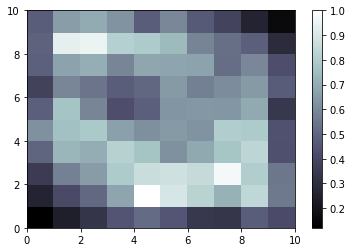

In [61]:
bone()
pcolor(som.distance_map().T)
colorbar()

* The customers who cheated and got approval are more relevant targets to fraud detection than the customers who didn't get approval and cheated.
* *Red circles* are the customers who didn't got approval
* *Green squares* are the customers who got approval
* the 0.5 is because the dots are located in the lower right corner of the square
* 

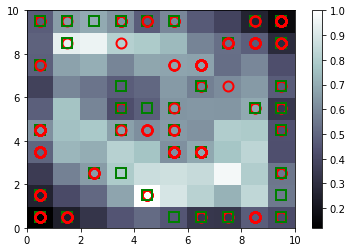

In [62]:
# Visualizing the results
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [63]:
# Finding the frauds
mappings = som.win_map(X)
print(mappings[(4,1)])

[array([0.88304923, 0.        , 0.08150376, 0.02089286, 0.        ,
       0.38461538, 0.375     , 0.02052632, 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.08      , 0.        ]), array([0.0989873 , 0.        , 0.16917293, 0.03125   , 0.5       ,
       1.        , 0.875     , 0.03649123, 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.08      , 0.0586    ]), array([0.80745128, 0.        , 0.54255639, 0.48517857, 0.5       ,
       0.23076923, 0.875     , 0.29824561, 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.00850922, 0.        , 0.22300752, 0.12642857, 0.5       ,
       0.15384615, 0.5       , 0.01754386, 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.0855    , 0.        ]), array([4.21657076e-01, 0.00000000e+00, 1.74135338e-01, 7.44642857e-02,
       5.00000000e-01, 5.38461538e-01, 8.75000000e-01, 9.64912281e-02,
       1.00000000e+00, 0.00000000e+00, 0.0000

In [67]:
frauds = sc.inverse_transform(mappings[(4,1)])
print(frauds.shape)
frauds[1,:]

(20, 15)


array([1.5590434e+07, 0.0000000e+00, 2.5000000e+01, 8.7500000e-01,
       2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 1.0400000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       2.0000000e+00, 1.6000000e+02, 5.8610000e+03])